### setup paths

In [1]:
import os
import subprocess

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
  if not os.path.exists(path):
    if os.name == 'posix':
      subprocess.run(['mkdir', '-p', path])
    elif os.name == 'nt':
      subprocess.run(['mkdir', path])


### download tensorflow pretrained models from TF model zoo and install TFOD

In [6]:
# https://www.tensorflow.org/install/source_mac#gpu

In [7]:
%pip install wget

DEPRECATION: Loading egg at /Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/metaflow-2.9.11-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

zsh:1: command not found: apt-get
DEPRECATION: Loading egg at /Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/metaflow-2.9.11-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Processing /Users/millionairemacmillionairemac/Developer/Android Video Object Detection + OCR AI App/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for tensorflow~=2.14.0 from https://files.pythonhosted.org/packages/22/50/1e211cbb5e1f52e55eeae1605789c9d24403962d37581cf0deb3e6b33377/tensorflow-2.14.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata (3.9 kB)
  Obtaining dependency information for protobuf<4.24.0,>=3.20.3 from https://files.pythonhosted.org/packages/cb/d3/a164038605494d49acc4f9cda1c0bc200b96382c53edd561387263bb181d/protobuf-4.23.4-cp37-abi3-macosx_10_9_universa

In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-10-11 15:04:33.884165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Running tests under Python 3.11.4: /Users/millionairemacmillionairemac/miniconda3/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1011 15:04:53.199013 4495085056 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
/Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'

In [11]:
# !pip install tensorflow --upgrade
!pip install tensorflow==2.13.0
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

DEPRECATION: Loading egg at /Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/metaflow-2.9.11-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/86/a3/a6ffba31621a402d12b137e656814c7b8de2f796fa976acbe92f4602ebad/tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata (3.2 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Obtaining dependency information for tensorflow-estimator<2.14,>=2.13.0 from https://files.pythonhosted.org/packages/72/5c/c318268d96791c6222ad7df1651bbd1b2409139afeb6f468c0f327177016/tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Obtaining dependency information for 

In [12]:
import object_detection

In [13]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-10-11 15:05:59--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.223.91, 142.250.199.59, 216.58.200.27, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.223.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  8.43MB/s    in 2.3s    

2023-10-11 15:06:02 (8.43 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnli

### create label map

In [14]:
labels = [
    { 'name': 'submarine', 'id': 1 },
    { 'name': 'b', 'id': 2 },
    { 'name': 'harpoon', 'id': 3 },
    { 'name': 'boat', 'id': 4 },
    { 'name': 'compass', 'id': 5 },
    { 'name': 'dog', 'id': 6 },
    { 'name': 'anchor', 'id': 7 },
    { 'name': 'wild', 'id': 8 },
    { 'name': 'person', 'id': 9 },
    { 'name': 'mine', 'id': 10 },
    { 'name': 'skull', 'id': 11 },
    { 'name': 'gold', 'id': 12 },
    { 'name': 'n', 'id': 13 },
    { 'name': 'o', 'id': 14 },
    { 'name': 'treasure', 'id': 15 },
    { 'name': 's', 'id': 16 },
    { 'name': 'kaboom', 'id': 17 },
    { 'name': 'shark', 'id': 18 },
    { 'name': 'u', 'id': 29 }
]


with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [15]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/compass.354b759e-6354-11ee-bb1f-acde48001122.jpg
x Tensorflow/workspace/images/train/compass.354b759e-6354-11ee-bb1f-acde48001122.xml
x Tensorflow/workspace/images/train/compass.35d0d270-6354-11ee-bb1f-acde48001122.xml
x Tensorflow/workspace/images/train/compass.35d0d270-6354-11ee-bb1f-acde48001122.jpg
x Tensorflow/workspace/images/train/compass.356c7b0e-6354-11ee-bb1f-acde48001122.jpg
x Tensorflow/workspace/images/train/compass.356c7b0e-6354-11ee-bb1f-acde48001122.xml
x Tensorflow/workspace/images/train/compass.35d83ede-6354-11ee-bb1f-acde48001122.jpg
x Tensorflow/workspace/images/train/compass.35d83ede-6354-11ee-bb1f-acde48001122.xml
x Tensorflow/workspace/images/train/compass.dbbbd604-634e-11ee-b6fb-acde48001122.jpg
x Tensorflow/workspace/images/train/compass.dbbbd604-634e-11ee-b6fb-acde48001122.xml
x Tensorflow/workspace/images/train/compass.dbda0638-634e-11ee-b6fb-acde48001122.jpg
x Tensorflow/workspace/image

In [16]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [17]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "/Users/millionairemacmillionairemac/Developer/Android Video Object Detection + OCR AI App/Tensorflow/scripts/generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/Users/millionairemacmillionairemac/miniconda3/lib/python3.11/site-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
             ^^^^^^^^^^
  File "/Users/millionairemacmillionairemac/Developer/Android Video Object Detection + OCR AI App/Tensorflow/scripts/generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

### copy model config to training folder

In [18]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

### update config for transfer learning

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2023-10-11 15:06:37.100440: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     use_depthwise: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10
       x_scale: 10
       height_scale: 5
       width_scale: 5
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatche

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

### train the model

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [25]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [26]:
!{ command }

2023-10-11 15:06:41.163219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1011 15:06:46.129997 4636323328 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I1011 15:06:46.147794 4636323328 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1011 15:06:46.147896 4636323328 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Reading unweighted datasets: ['Tensorflow/workspace/annotations/train.record']
I1011 15:06:46.174032 4636323328 dataset_builder.py:162] Rea

### evaluate the model

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [28]:
!{ command }

2023-10-11 15:28:28.508565: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1011 15:28:34.476026 4582788608 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1011 15:28:34.476165 4582788608 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1011 15:28:34.476222 4582788608 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1011 15:28:34.476276 4582788608 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1011 15:28:34.476348 4582788608 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead enco

In [29]:
### load train model from checkpoint

In [30]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [31]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

### detect from an image

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'compass.dbe69876-634e-11ee-b6fb-acde48001122.jpg')

[[[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 ...

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [ 9  1  2]
  [ 9  1  2]
  [ 9  1  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [ 9  1  2]
  [ 9  1  2]
  [ 9  1  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [ 9  1  2]
  [ 9  1  2]
  [ 9  1  2]]]
[[[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [11  0  2]
  [11  0  2]
  [11  0  2]]

 ...

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [ 9  1  2]
  [ 9  1  2]
  [ 9  1  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  ...
  [ 9  1  2]
  [ 9  1  2]
  [ 9  1  2]]

 [[ 6  0  1]
  [ 6  0  1]
  [ 6  0  1]
  .

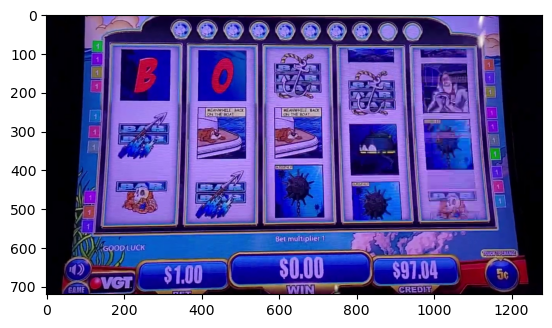

In [34]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
print(input_tensor)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()